# Sheet Code

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Color

## Escala de grises

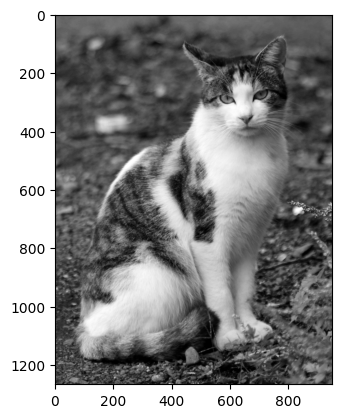

In [5]:
# Lectura de la imagen con la posición relativa de la imagen, es decir, desde el propio script
imgGato = cv2.imread("res/gato.jpg", cv2.IMREAD_GRAYSCALE) # Se lee la imagen en escala de grises, por eso la flag es grayscale
# Ahora, se usa matplotlib para mostrar la imagen
plt.imshow(imgGato, cmap="gray")

Al ser escala de grises sólo se tiene un arreglo bidimensional, es decir, que sólo tenemos el largo y el ancho de la imagen (En los demás espacios se tiene un arreglo tridimensional, dado que se agrega el valor por cada canal)

In [4]:
imgGato.shape # Se obtiene la forma de la imagen, es decir, las dimensiones de la imagen

(1267, 950)

Otra habilidad que se puede realizar sobre las imagenes es el slicing, dado que al final lo que estamos manejando son listas (arreglos).

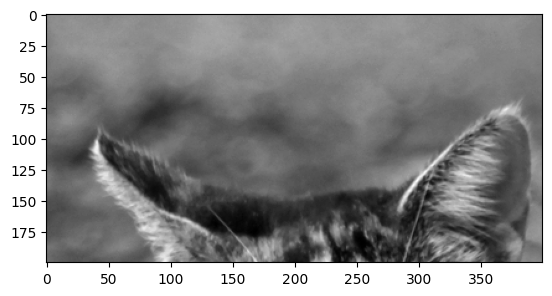

In [6]:
# Quiero agarrar sólo las orejas del miau
orejas = imgGato[0:200, 400:800] # Se obtienen las orejas de la imagen
plt.imshow(orejas, cmap="gray") # Se muestra la imagen de las orejas

Pero no sólo podemos crear una imagen a partir del slicing, sino que podemos modificar los valores del arreglo completo.
Nota: Siempre es buena práctica realizar una copia de la imagen en vez de modificar directamente el arreglo original, esto para poder hacer diferentes modificaciones en diferentes copias.

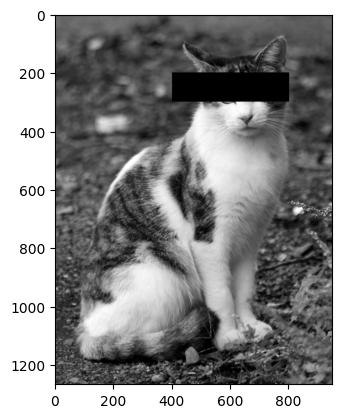

In [8]:
# Hacemos la copia
imgGatoCopiada = imgGato.copy()
# Hagamos una barra negra a los ojos del gato
imgGatoCopiada[200:300, 400:800] = 0 # 0 es negro, 255 es blanco. Recordar que los valores van de 0 a 255
plt.imshow(imgGatoCopiada,cmap='gray')

## Espacios de color

* RGB: Combinación del rojo, verde y ázul.
* CMY: Combinación del cyan, magenta y amarillo.
* YIQ: Luminancia (Y), naranja-ázul (I), morado-verde (Q)
* YUV: Similar al YIQ, corrige errores de transmisión de color.
* HSL: Matiz (H), saturación (S) y luminosidad (L).
* HSV: Matiz (H), saturación (S) y valor (V)
* LAB: Luminosidad (L), verde-rojo (A), ázul-amarillo (B)
* XYZ: X y Z es la cromaticidad, Y es el brillo

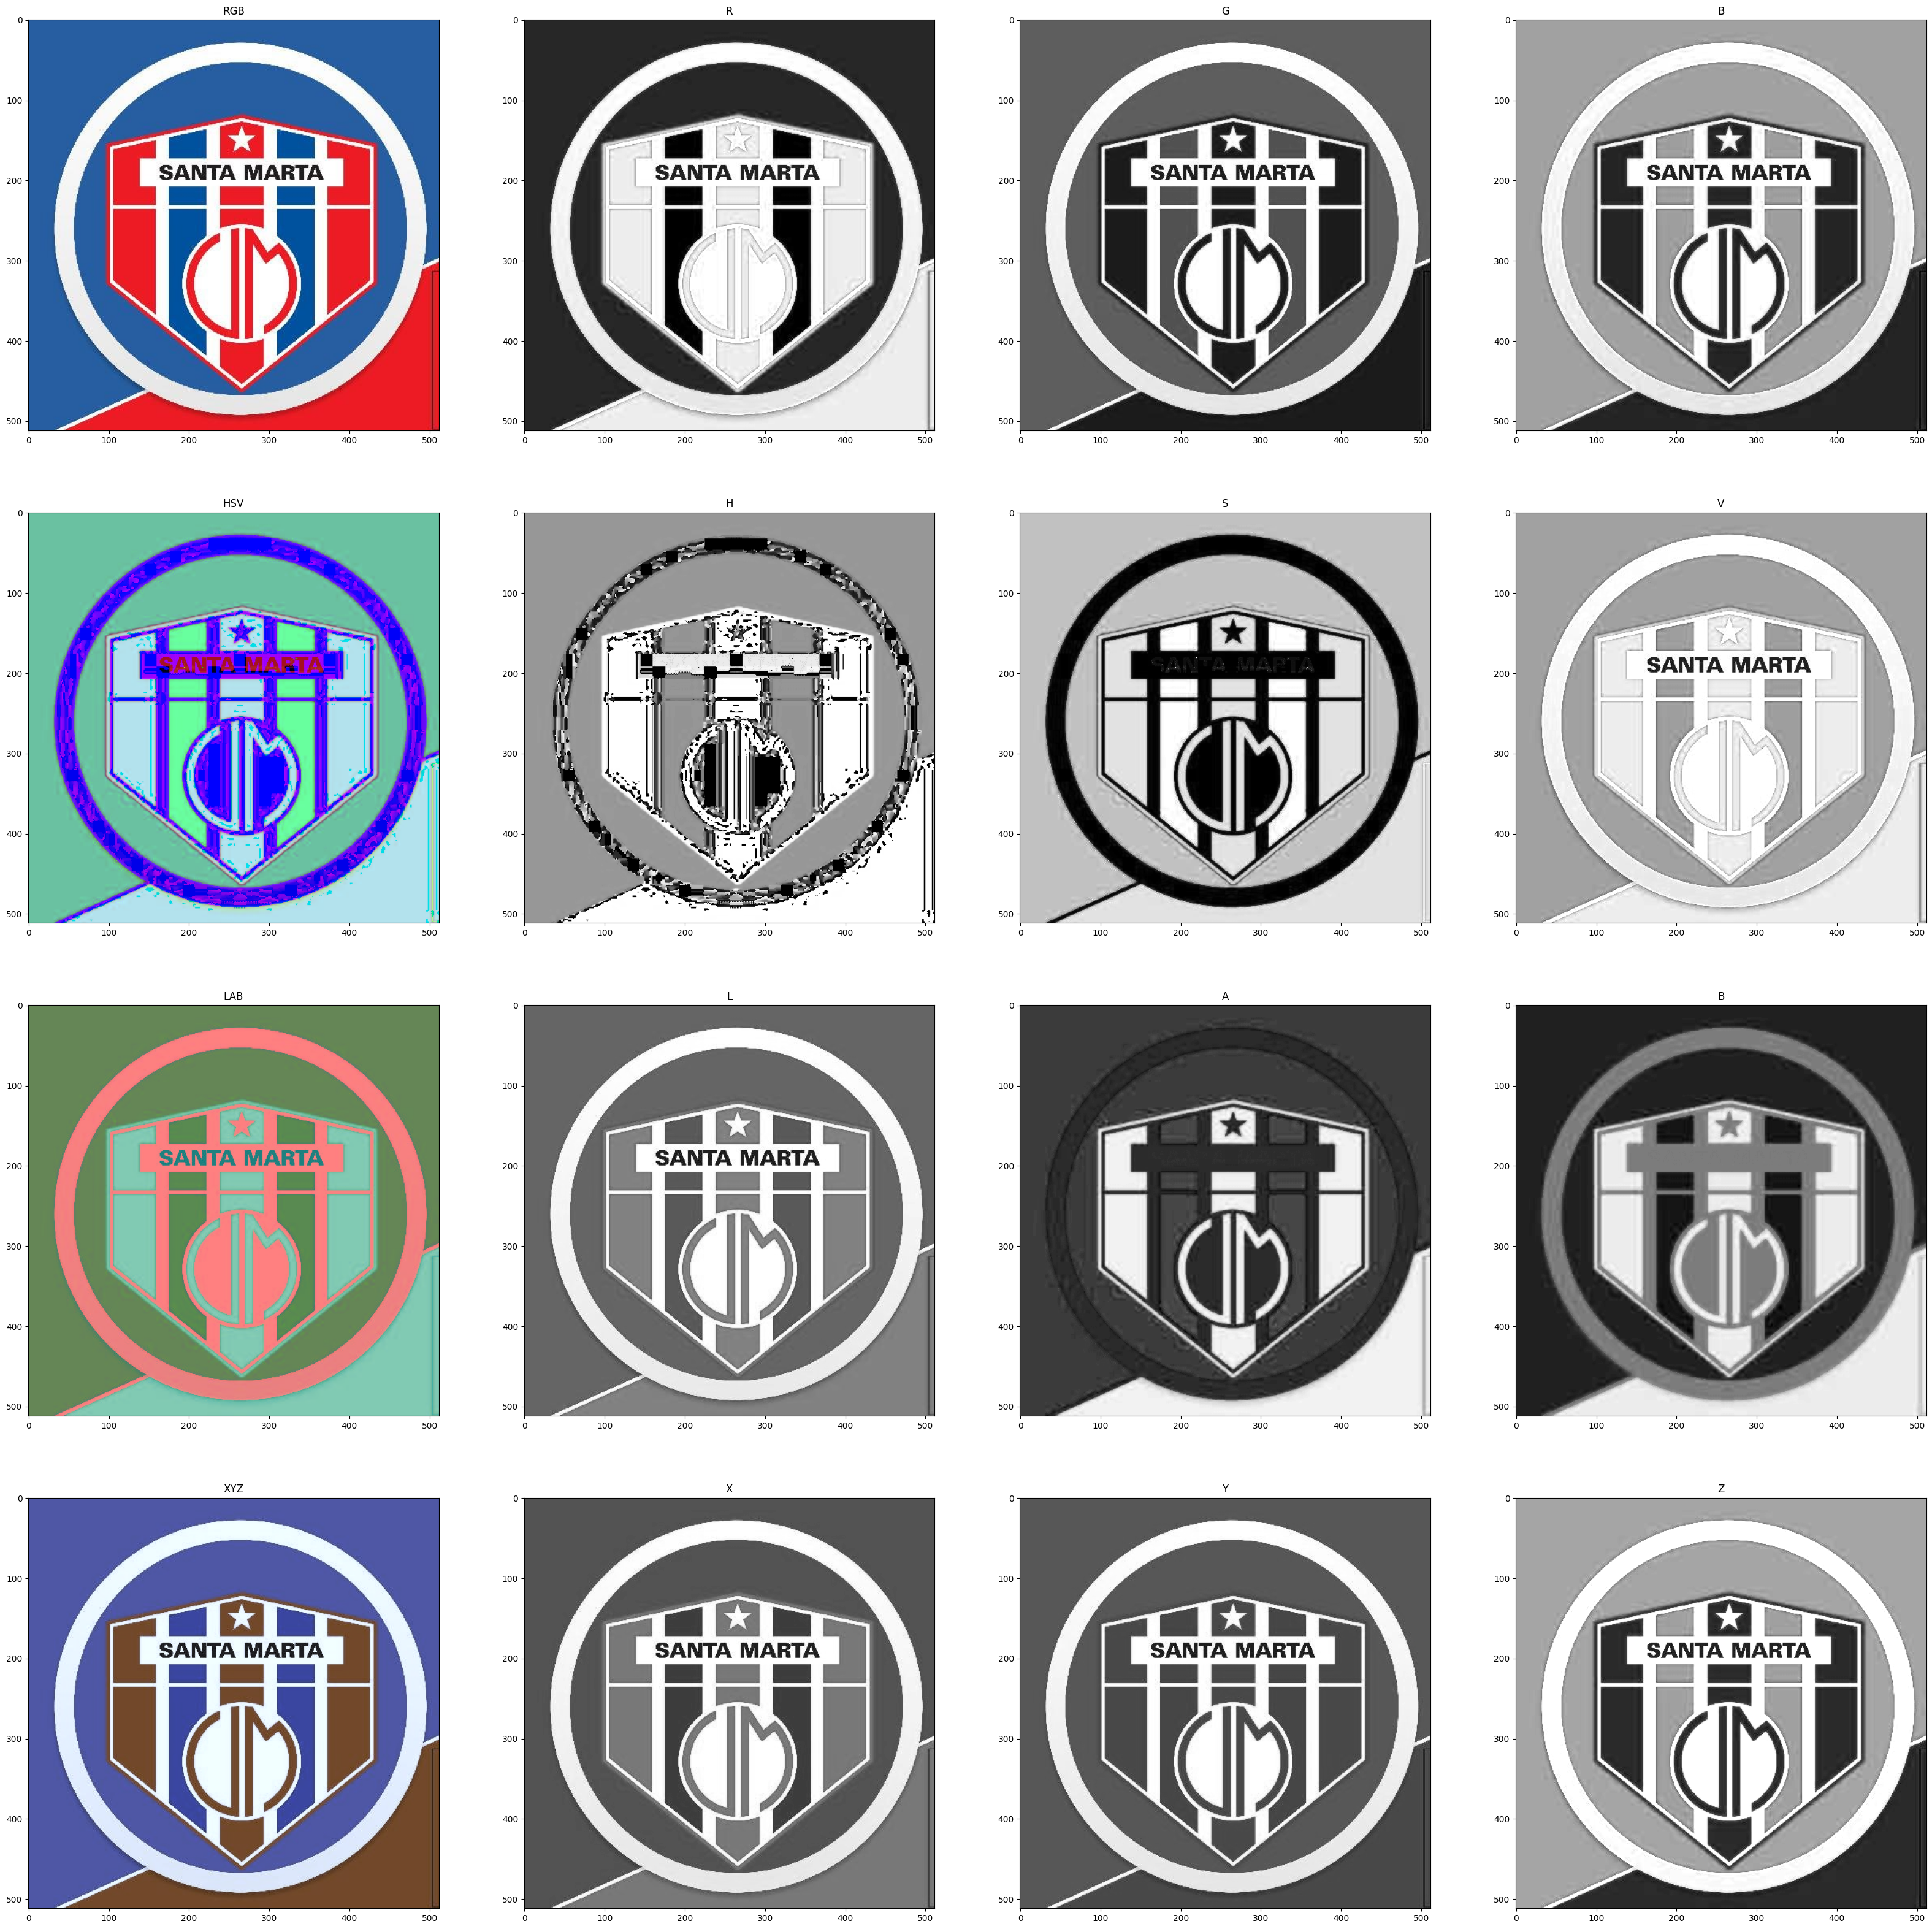

In [5]:
# Primera consideración: CSV agarra de BGR, toca transformar a RGB
imgUnion = cv2.cvtColor(cv2.imread("res/union.jpg"),cv2.COLOR_BGR2RGB)
# Ahora sí, a transformar a los espacios de color
# HSV
imgHSV = cv2.cvtColor(imgUnion,cv2.COLOR_RGB2HSV)
# LAB
imgLAB = cv2.cvtColor(imgUnion,cv2.COLOR_RGB2LAB)
# XYZ
imgXYZ = cv2.cvtColor(imgUnion,cv2.COLOR_RGB2XYZ)
# A realizar el subplot
fig, plots = plt.subplots(4,4,figsize=(40,40))

#RGB
plots[0,0].set_title('RGB')
plots[0,0].imshow(imgUnion)

plots[0,1].set_title('R')
plots[0,1].imshow(imgUnion[:,:,0],cmap="gray")

plots[0,2].set_title('G')
plots[0,2].imshow(imgUnion[:,:,1],cmap="gray")

plots[0,3].set_title('B')
plots[0,3].imshow(imgUnion[:,:,2],cmap="gray")

# HSV

plots[1, 0].set_title('HSV')
plots[1, 0].imshow(imgHSV)

plots[1, 1].set_title('H')
plots[1, 1].imshow(imgHSV[:, :, 0], cmap="gray")  

plots[1, 2].set_title('S')
plots[1, 2].imshow(imgHSV[:, :, 1], cmap="gray")  # Access saturation channel

plots[1, 3].set_title('V')
plots[1, 3].imshow(imgHSV[:, :, 2], cmap="gray")  # Access value channel

# LAB

plots[2, 0].set_title('LAB')
plots[2, 0].imshow(imgLAB)

plots[2, 1].set_title('L')
plots[2, 1].imshow(imgLAB[:, :, 0], cmap="gray")  # Access lightness channel

plots[2, 2].set_title('A')
plots[2, 2].imshow(imgLAB[:, :, 1], cmap="gray")  # Access A channel

plots[2, 3].set_title('B')
plots[2, 3].imshow(imgLAB[:, :, 2], cmap="gray")  # Access B channel

# XYZ


plots[3, 0].set_title('XYZ')
plots[3, 0].imshow(imgXYZ)

plots[3, 1].set_title('X')
plots[3, 1].imshow(imgXYZ[:, :, 0], cmap="gray")  # Access X channel

plots[3, 2].set_title('Y')
plots[3, 2].imshow(imgXYZ[:, :, 1], cmap="gray")  # Access Y channel

plots[3, 3].set_title('Z')
plots[3, 3].imshow(imgXYZ[:, :, 2], cmap="gray")  # Access Z channel

## Transformaciones básicas

### Histogramas

In [12]:
# Funciones auxiliares para plotear las imagenes

def show_image_and_histogram(img_gray):
    """
    Muestra la imagen y su histograma en dos figuras.

    Parámetros:
    img_gray: Imagen en escala de grises 

    """

    # Create a figure with two subplots, one for the image and one for the histogram
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Show the image in the first subplot
    ax1.imshow(img_gray, cmap = "gray")
    ax1.set_title('Imagen')

    # Calculate the histogram of the image
    hist, bins = np.histogram(img_gray.ravel(), 256, [0, 256], density= True)

    # Show the histogram in the second subplot
    ax2.plot(hist)
    ax2.set_title('Histograma')
    ax2.set_xlim([0, 256])

    # Display the plot
    plt.show()

def show_image_and_color_histogram(img_color):
    """
    Muestra la imagen y su histograma en dos figuras.

    Parámetros:
    img_color: Imagen en RGB 

    """

    # Create a figure with two subplots, one for the image and one for the histograms
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Show the image in the first subplot
    ax1.imshow(img_color)
    ax1.set_title('Imagen')

    # Calculate the histograms of the image for each color channel
    hist_red, bins = np.histogram(img_color[:,:,0].ravel(), 256, [0, 256], density = True)
    hist_green, bins = np.histogram(img_color[:,:,1].ravel(), 256, [0, 256], density = True)
    hist_blue, bins = np.histogram(img_color[:,:,2].ravel(), 256, [0, 256], density = True)

    # Show the histograms in the second subplot
    ax2.plot(hist_red, color='r')
    ax2.plot(hist_green, color='g')
    ax2.plot(hist_blue, color='b')
    ax2.set_title('Histograma')
    ax2.set_xlim([0, 256])

    # Display the plot
    plt.show()
    
def img_read(filename, mode='color'):
    """
    Lee una imagen ya sea en escala de grises o en RGB.

    Parámetros:
    filename: La ruta del archivo de la imagen a leer.
    mode: Modo de lectura de la imagen. 
    
    Returns:
    Imagen en RGB o en escala de grises.
    """
    if mode == 'color':
        # Lee la imagen a color utilizando OpenCV y la convierte de BGR a RGB
        return cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
    elif mode in ('grayscale', 'greyscale', 'gray', 'grey'):
        # Lee la imagen en escala de grises utilizando OpenCV
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        # Modo de lectura inválido
        return None

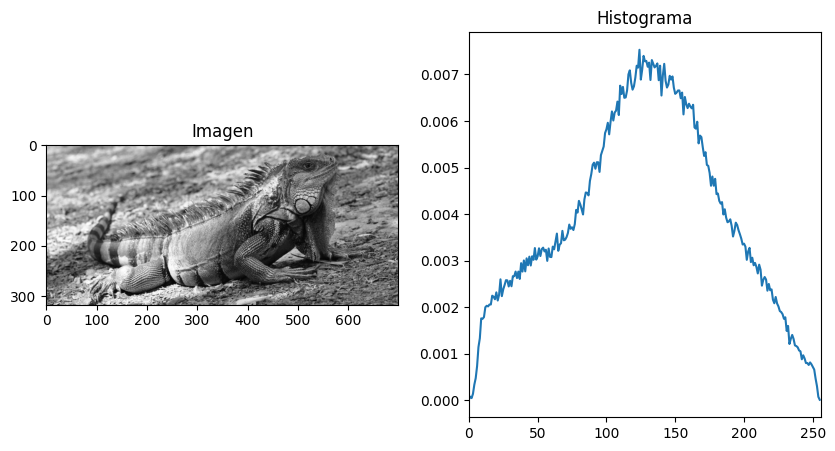

In [7]:
imgIguanaGris = img_read("res/iguana.jpg", mode='gray')
# Mostemos la imagen y el histograma en escala de grises
show_image_and_histogram(imgIguanaGris)

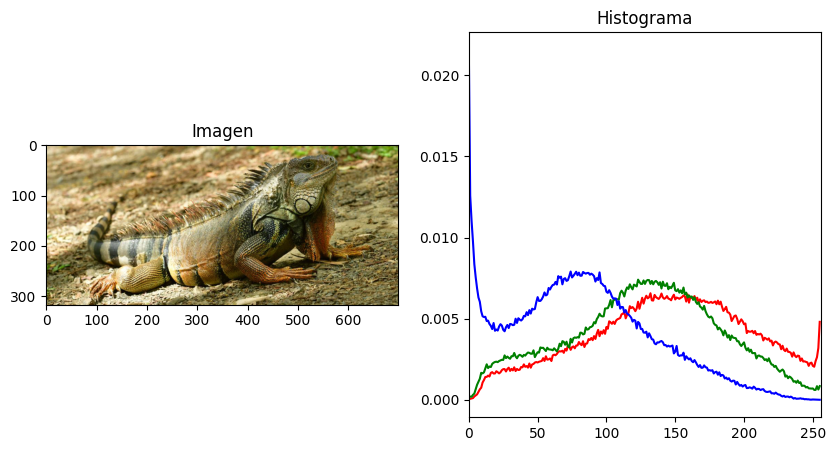

In [8]:
# Mostremos la imagen y el histograma en color
imgIguanaColor = img_read("res/iguana.jpg", mode='color')
show_image_and_color_histogram(imgIguanaColor)

## Operaciones

### Suma

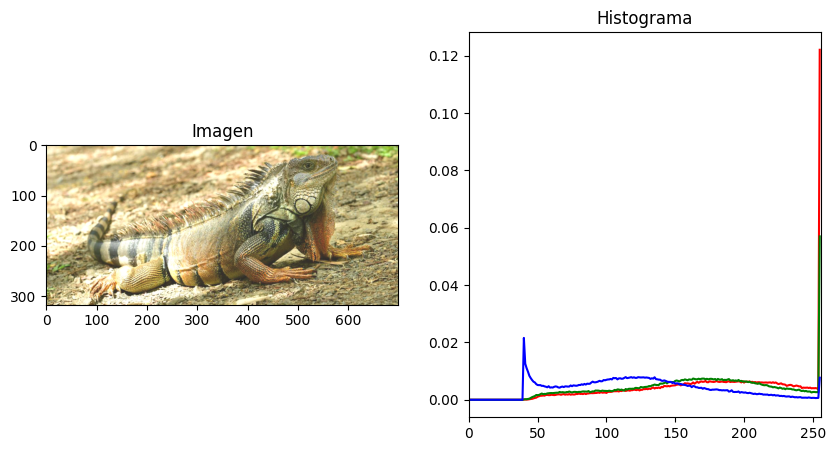

In [13]:
iguanaSuma = cv2.add(imgIguanaColor, 40) # Se suma 40
show_image_and_color_histogram(iguanaSuma) # Se muestra el histograma de la imagen

### Resta

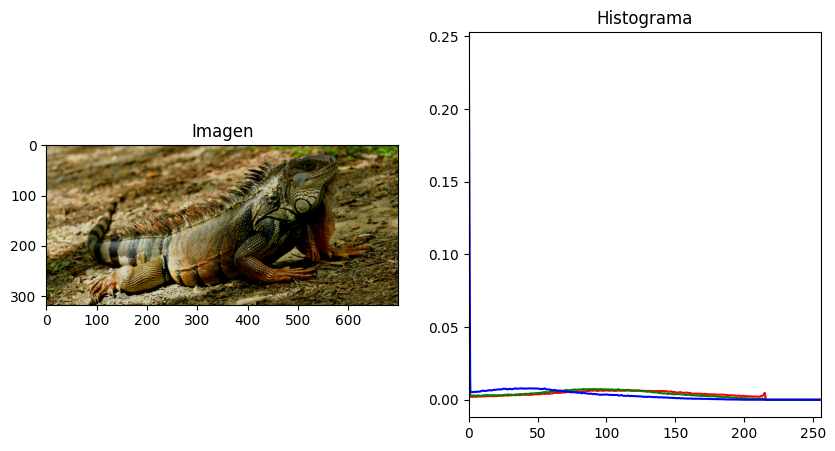

In [14]:
iguanaResta = cv2.subtract(imgIguanaColor, 40) # Se resta 40
show_image_and_color_histogram(iguanaResta) # Se muestra el histograma de la imagen

### Negativo

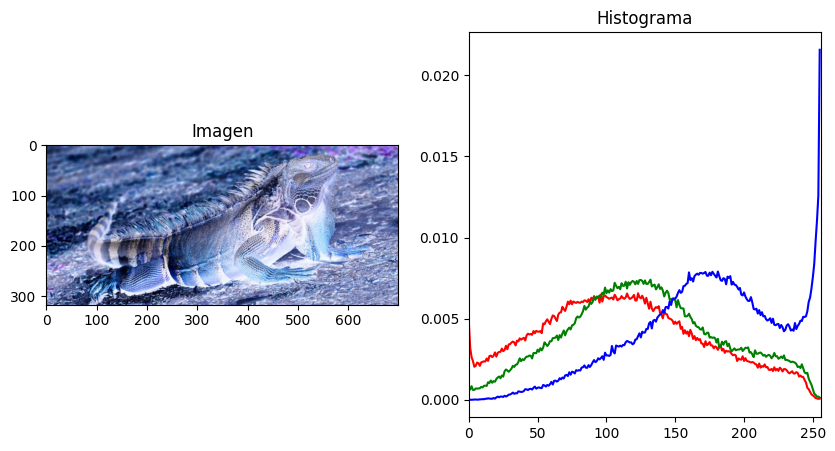

In [15]:
iguanaNegativo = cv2.bitwise_not(imgIguanaColor) # Se obtiene el negativo de la imagen
show_image_and_color_histogram(iguanaNegativo) # Se muestra el histograma de la imagen

### Multiplicación

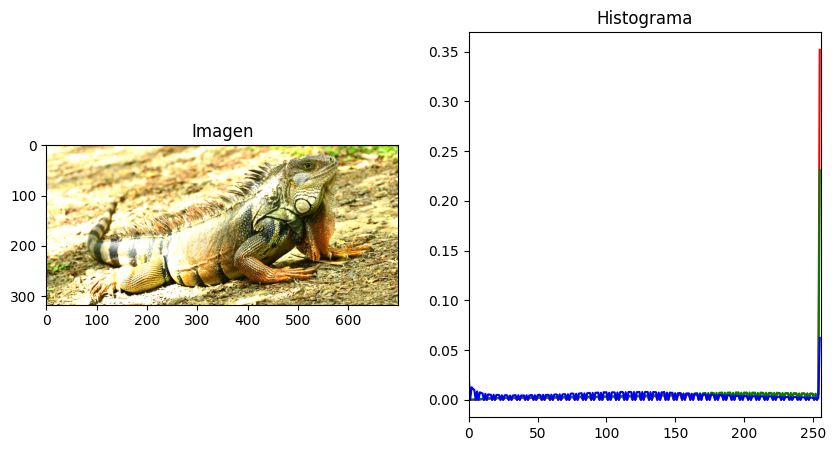

In [16]:
iguanaMultiplicacion = cv2.multiply(imgIguanaColor, 1.5) # Se multiplica por 1.5
show_image_and_color_histogram(iguanaMultiplicacion) # Se muestra el histograma de la imagen

### División

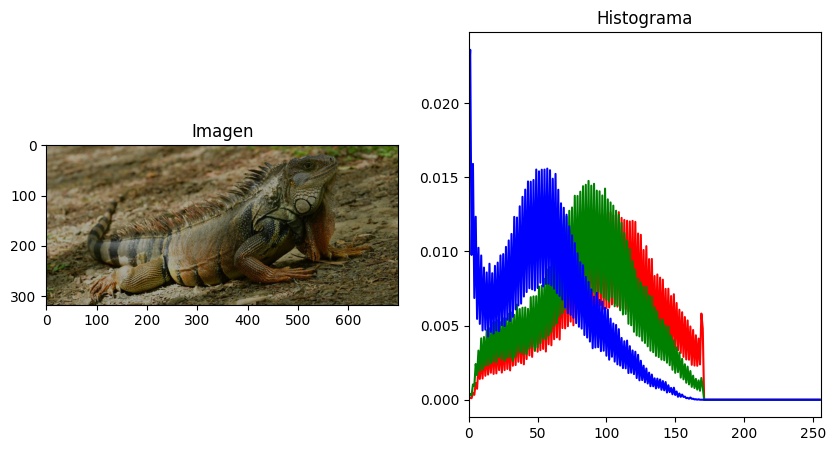

In [17]:
iguanaDivision = cv2.divide(imgIguanaColor, 1.5) # Se divide por 1.5
show_image_and_color_histogram(iguanaDivision) # Se muestra el histograma de la imagen